In [3]:
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from numpy.core.umath_tests import inner1d

from sklearn.ensemble import RandomForestClassifier

#Data-preparation

#In general :

#Since the MNIST dataset is divided into standard training and testing sets, 80% and 20% respectively, 
#we divide the MNIST training set into two proportions, 80% as a training set and 20% as a validation set. 
#Therefore, the MNIST dataset is divided into three sets: training set (60%), validation set (20%), and testing set (20%). 
#The training set is used to train the classifiers for the purpose of recognizing handwritten digits while the test set 
#is used to assess the trained classifiers after fine-tuning them using the validation set.


#Here we are doing Training and Validation Step with Cross-Validation (CVGridSearch)

images = np.loadtxt("handwritten_digits_images.csv", delimiter=',')
labels = np.loadtxt("handwritten_digits_labels.csv", delimiter=',')

X_train, X_test, y_train, y_test  = train_test_split(images, labels, test_size=0.2, random_state=32)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)


#Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_val = X_val.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255
#X_val /= 255

In [4]:
rfc = RandomForestClassifier(n_jobs=-1)

grid_params = {"n_estimators": range(1, 20)}

grid_search = GridSearchCV(rfc, grid_params, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print()
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)

predicted = grid_search.predict(X_test)

acc = accuracy_score(y_test, predicted)

print(acc)

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] n_estimators=1 ..................................................
[CV] n_estimators=1 ..................................................
[CV] n_estimators=1 ..................................................
[CV] ................................... n_estimators=1, total=   0.6s
[CV] n_estimators=2 ..................................................
[CV] ................................... n_estimators=1, total=   0.6s
[CV] n_estimators=2 ..................................................
[CV] ................................... n_estimators=1, total=   0.6s
[CV] n_estimators=2 ..................................................
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=2, total=   0.7s
[CV] n_estimators=3 ..................................................
[CV] ................................... n_estimators=2, total=   0.7s
[CV] n_estimator

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s


[CV] n_estimators=10 .................................................
[CV] ................................... n_estimators=9, total=   2.0s
[CV] n_estimators=11 .................................................
[CV] ................................... n_estimators=9, total=   2.1s
[CV] n_estimators=11 .................................................
[CV] .................................. n_estimators=10, total=   2.1s
[CV] n_estimators=11 .................................................
[CV] .................................. n_estimators=10, total=   2.0s
[CV] n_estimators=12 .................................................
[CV] .................................. n_estimators=10, total=   2.0s
[CV] n_estimators=12 .................................................
[CV] n_estimators=12 .................................................
[CV] .................................. n_estimators=11, total=   2.6s
[CV] n_estimators=13 .................................................
[CV] .

[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   35.3s finished



Best parameters set found on development set:

{'n_estimators': 19}
0.9583571428571429



FEATURE SELECTION


Features that are used in any machine learning method have a huge influence on the obtained results. Having Irrelevant or partially relevant features can negatively affect performance of many models, especially linear algorithms like logistic regression.

Feature selection (FS) is a process of selecting features that contribute most to the prediction variable. An FS method selects a subset of relevant features and discards irrelevant/redundant features. The benefits of performing FS before data modeling are :

 Reduces Overfitting: Less redundant data implies less chance to make decisions based on noise.

 Improves Accuracy: Less misleading data implies modeling accuracy improves.

 Reduces Training Time: Less data implies that algorithms train faster.


In this case we can see that there are lot of useless features. And so for instance we can perform PCA in order to reduce input dimensions.

Feature ranking:
1. feature 433 (0.014569)
2. feature 378 (0.012758)
3. feature 542 (0.008799)
4. feature 543 (0.007621)
5. feature 434 (0.007384)
6. feature 350 (0.007381)
7. feature 318 (0.007285)
8. feature 347 (0.007252)
9. feature 406 (0.007020)
10. feature 323 (0.006652)
11. feature 457 (0.006468)
12. feature 262 (0.006461)
13. feature 375 (0.006432)
14. feature 377 (0.006399)
15. feature 295 (0.006394)
16. feature 486 (0.006378)
17. feature 596 (0.006322)
18. feature 354 (0.006286)
19. feature 322 (0.006256)
20. feature 155 (0.006216)
21. feature 483 (0.006209)
22. feature 569 (0.006145)
23. feature 488 (0.006107)
24. feature 657 (0.006035)
25. feature 183 (0.006012)
26. feature 239 (0.005931)
27. feature 459 (0.005707)
28. feature 376 (0.005704)
29. feature 351 (0.005698)
30. feature 464 (0.005692)
31. feature 490 (0.005676)
32. feature 291 (0.005675)
33. feature 184 (0.005629)
34. feature 514 (0.005513)
35. feature 211 (0.005479)
36. feature 379 (0.005449)
37. feature 460 (0.0

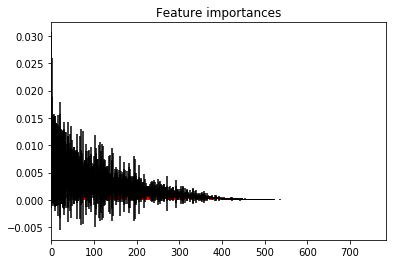

In [7]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=19,
                              random_state=32)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()